In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

warnings.filterwarnings('ignore')

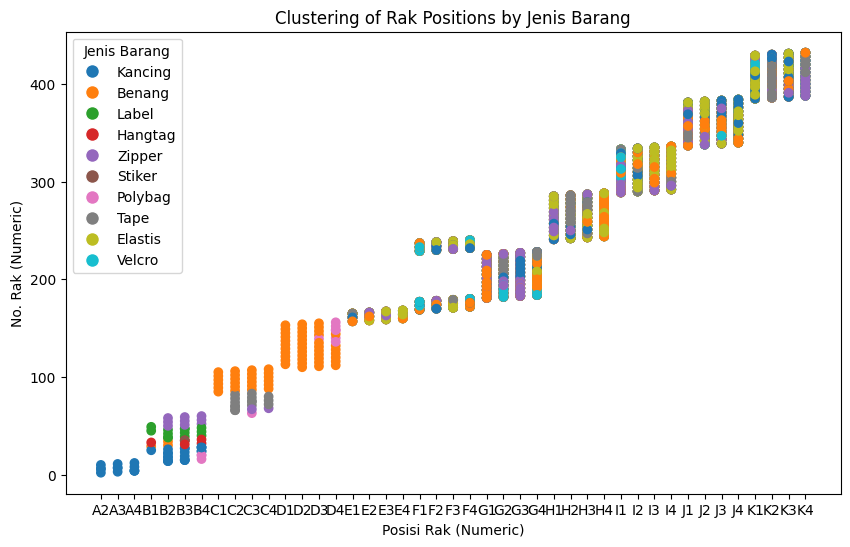

In [77]:
df = pd.read_csv('../Data/Processed/df.csv')
df.sort_values(by='Posisi Rak', inplace=True)
unique_items = df['Jenis Barang'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_items))  # Get a colormap with enough colors
color_map = {label: colors(i) for i, label in enumerate(unique_items)}

# Assign colors to each point based on 'Jenis Barang'
df['color'] = df['Jenis Barang'].map(color_map)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Posisi Rak'], df['No. Rak'], c=df['color'])

# Create a legend
legend_labels = unique_items
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                       markerfacecolor=color_map[label],
                       markersize=10) for label in legend_labels]

plt.xlabel('Posisi Rak (Numeric)')
plt.ylabel('No. Rak (Numeric)')
plt.title('Clustering of Rak Positions by Jenis Barang')
plt.legend(handles=handles, title='Jenis Barang')

plt.show()

# Import data

In [78]:
df = pd.read_csv('../Data/Processed/df.csv')

In [79]:
data_rak = pd.read_csv('../data/raw/data_rak.csv', sep=';')
data_rak.dropna(inplace=True)
no_rak_mapping = data_rak.groupby('Posisi Rak')['No. Rak'].apply(list).to_dict()

In [80]:
# Step 1: Feature Encoding for Clustering
satuan_dummies = pd.get_dummies(df['Satuan'])
df_encoded = pd.concat([df[['Kode Kelompok Barang', 'Kuantitas']], satuan_dummies], axis=1)

# Step 2: Clustering
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust number of clusters as needed
df['Cluster'] = kmeans.fit_predict(df_encoded)

In [81]:
# Prepare to assign Posisi Rak and No. Rak
posisi_rak = []
no_rak_assigned = []

# Create a set to track which No. Rak has already been used
used_no_rak = set()

# Limit the number of positions to A1-K4 (A-K)
max_positions = 4  # Up to 4 for each letter A to K

for cluster in df['Cluster'].unique():
    items_in_cluster = df[df['Cluster'] == cluster]
    
    # Initialize a counter for positions (1-4) per cluster
    position_counter = 0
    
    for idx, row in items_in_cluster.iterrows():
        letter = chr(65 + (cluster % 11))  # A=0 to K=10, generates letters A to K
        
        # Assign the correct position (1-4)
        position = f"{letter}{(position_counter % max_positions) + 1}"
        
        # Check if position is in the mapping and get available No. Rak
        available_no_rak = no_rak_mapping.get(position, [])
        
        # Assign the first available No. Rak that hasn't been used
        assigned_rak = None
        for rak in available_no_rak:
            if rak not in used_no_rak:
                assigned_rak = rak
                used_no_rak.add(rak)
                break
        
        # Append the assigned values
        posisi_rak.append(position)
        no_rak_assigned.append(assigned_rak)  # None if no rack available
        
        position_counter += 1

# Add assigned racks to DataFrame
df['Posisi Rak'] = posisi_rak
df['No. Rak Assigned'] = no_rak_assigned

# Display the updated DataFrame with assigned positions and rack
df[['Kode Kelompok Barang', 'Jenis Barang', 'Kuantitas', 'Satuan', 'No. Rak', 'Posisi Rak', 'No. Rak Assigned', 'Cluster']]

F1 [169.0, 173.0, 177.0, 229.0, 233.0, 237.0]
F2 [170.0, 174.0, 178.0, 230.0, 234.0, 238.0]
F3 [171.0, 175.0, 179.0, 231.0, 235.0, 239.0]
F4 [172.0, 176.0, 180.0, 232.0, 236.0, 240.0]
F1 [169.0, 173.0, 177.0, 229.0, 233.0, 237.0]
F2 [170.0, 174.0, 178.0, 230.0, 234.0, 238.0]
F3 [171.0, 175.0, 179.0, 231.0, 235.0, 239.0]
F4 [172.0, 176.0, 180.0, 232.0, 236.0, 240.0]
F1 [169.0, 173.0, 177.0, 229.0, 233.0, 237.0]
F2 [170.0, 174.0, 178.0, 230.0, 234.0, 238.0]
F3 [171.0, 175.0, 179.0, 231.0, 235.0, 239.0]
F4 [172.0, 176.0, 180.0, 232.0, 236.0, 240.0]
F1 [169.0, 173.0, 177.0, 229.0, 233.0, 237.0]
F2 [170.0, 174.0, 178.0, 230.0, 234.0, 238.0]
F3 [171.0, 175.0, 179.0, 231.0, 235.0, 239.0]
F4 [172.0, 176.0, 180.0, 232.0, 236.0, 240.0]
F1 [169.0, 173.0, 177.0, 229.0, 233.0, 237.0]
F2 [170.0, 174.0, 178.0, 230.0, 234.0, 238.0]
F3 [171.0, 175.0, 179.0, 231.0, 235.0, 239.0]
F4 [172.0, 176.0, 180.0, 232.0, 236.0, 240.0]
F1 [169.0, 173.0, 177.0, 229.0, 233.0, 237.0]
F2 [170.0, 174.0, 178.0, 230.0, 23

,Kode Kelompok Barang,Jenis Barang,Kuantitas,Satuan,No. Rak,Posisi Rak,No. Rak Assigned,Cluster
0,200200.0,Kancing,405.0,grs,2,F1,169.0,5
1,200200.0,Kancing,662.0,grs,3,F2,170.0,5
2,200200.0,Kancing,2000.0,set,4,F3,171.0,5
3,200200.0,Kancing,591.0,pcs,4,F4,172.0,5
4,200200.0,Kancing,2100.0,grs,4,F1,173.0,5
...,...,...,...,...,...,...,...,...
3748,200202.0,Benang,10991.0,cns,428,C1,NaN,1
3749,200202.0,Benang,10991.0,cns,429,C2,NaN,1
3750,200202.0,Benang,10991.0,cns,430,C3,NaN,1
3751,200202.0,Benang,10991.0,cns,431,C4,NaN,1


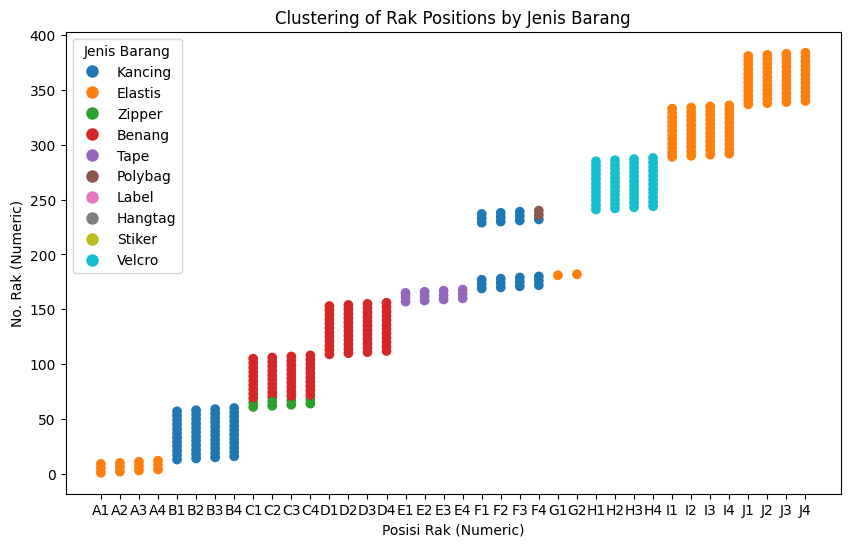

In [82]:
df.sort_values(by='Posisi Rak', inplace=True)
unique_items = df['Jenis Barang'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_items))  # Get a colormap with enough colors
color_map = {label: colors(i) for i, label in enumerate(unique_items)}

# Assign colors to each point based on 'Jenis Barang'
df['color'] = df['Jenis Barang'].map(color_map)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Posisi Rak'], df['No. Rak Assigned'], c=df['color'])

# Create a legend
legend_labels = unique_items
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                       markerfacecolor=color_map[label],
                       markersize=10) for label in legend_labels]

plt.xlabel('Posisi Rak (Numeric)')
plt.ylabel('No. Rak (Numeric)')
plt.title('Clustering of Rak Positions by Jenis Barang')
plt.legend(handles=handles, title='Jenis Barang')

plt.show()